<h1>COVID 19 Project</h1>

<h4>Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.</h4>

<h4>Guidelines:
● Use pandas to accumulate data from multiple data files.
● Use plotly (visualization library) to create interactive visualizations.
● Use Facebook prophet library to make time series models.
● Visualize the prediction by combining these technologies.
</h4>

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df = pd.read_csv("./covid_19_clean_complete.csv")
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [100]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [101]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [102]:
df.duplicated().sum()

0

In [103]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [104]:
df["Country/Region"].value_counts()

Country/Region
China             6204
Canada            2256
France            2068
United Kingdom    2068
Australia         1504
                  ... 
Holy See           188
Honduras           188
Hungary            188
Iceland            188
Lesotho            188
Name: count, Length: 187, dtype: int64

In [105]:
df[df["Country/Region"]=="India"]

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


<Axes: >

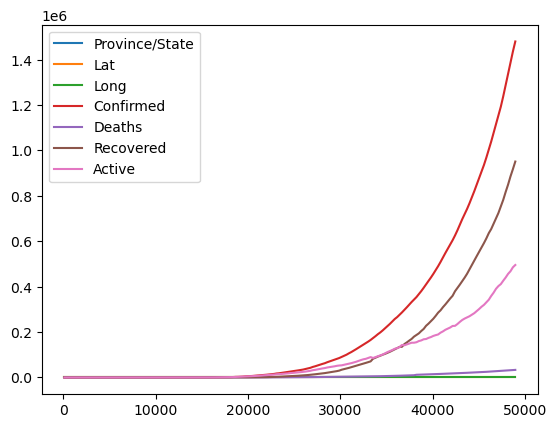

In [106]:
df[df["Country/Region"]=="India"].plot()

<Axes: >

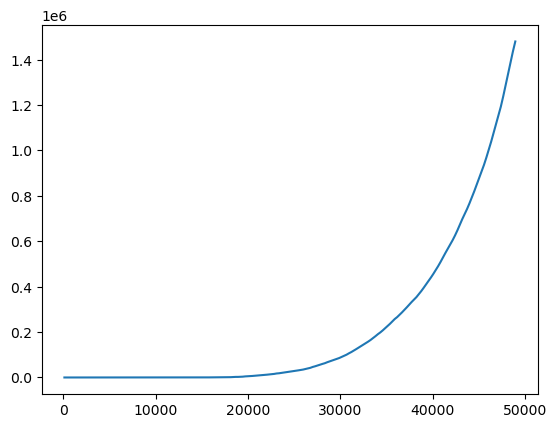

In [107]:
df[df["Country/Region"]=="India"]["Confirmed"].plot()

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,49068.0,21.433730,24.950320,-51.7963,7.873054,23.6345,41.204380,7.170690e+01
Long,49068.0,23.528236,70.442740,-135.0000,-15.310100,21.7453,80.771797,1.780650e+02
Confirmed,49068.0,16884.904255,127300.205272,0.0000,4.000000,168.0000,1518.250000,4.290259e+06
Deaths,49068.0,884.179160,6313.584411,0.0000,0.000000,2.0000,30.000000,1.480110e+05
Recovered,49068.0,7915.713479,54800.918731,0.0000,0.000000,29.0000,666.000000,1.846641e+06
Active,49068.0,8085.011617,76258.903026,-14.0000,0.000000,26.0000,606.000000,2.816444e+06


<Axes: xlabel='Date'>

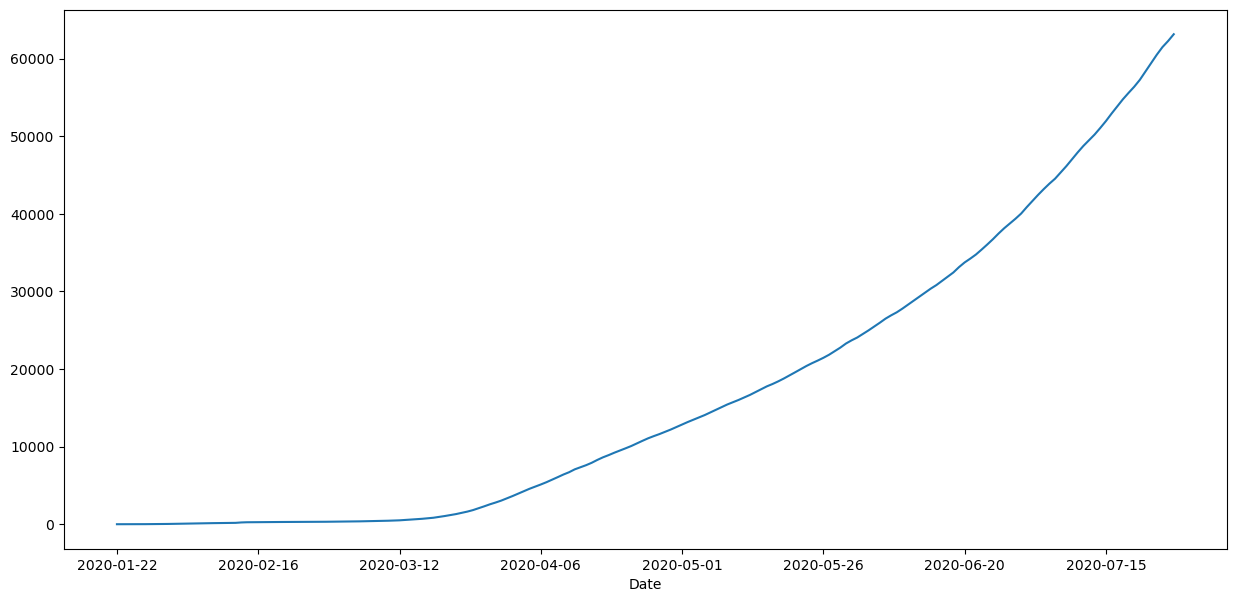

In [109]:
plt.figure(figsize = (15,7))
df.groupby("Date")["Confirmed"].mean().plot()

<Axes: xlabel='Country/Region'>

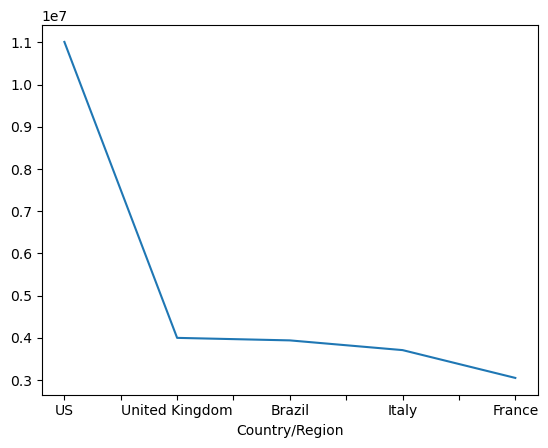

In [110]:
df.groupby("Country/Region")["Deaths"].sum().sort_values(ascending = False).head(5).plot()

In [111]:
df.groupby("Country/Region")["Recovered"].sum().sort_values(ascending = False).head(5)

Country/Region
US         56353416
Brazil     54492873
Russia     25120448
India      23783720
Germany    17107839
Name: Recovered, dtype: int64

In [112]:
df["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

<Axes: xlabel='WHO Region'>

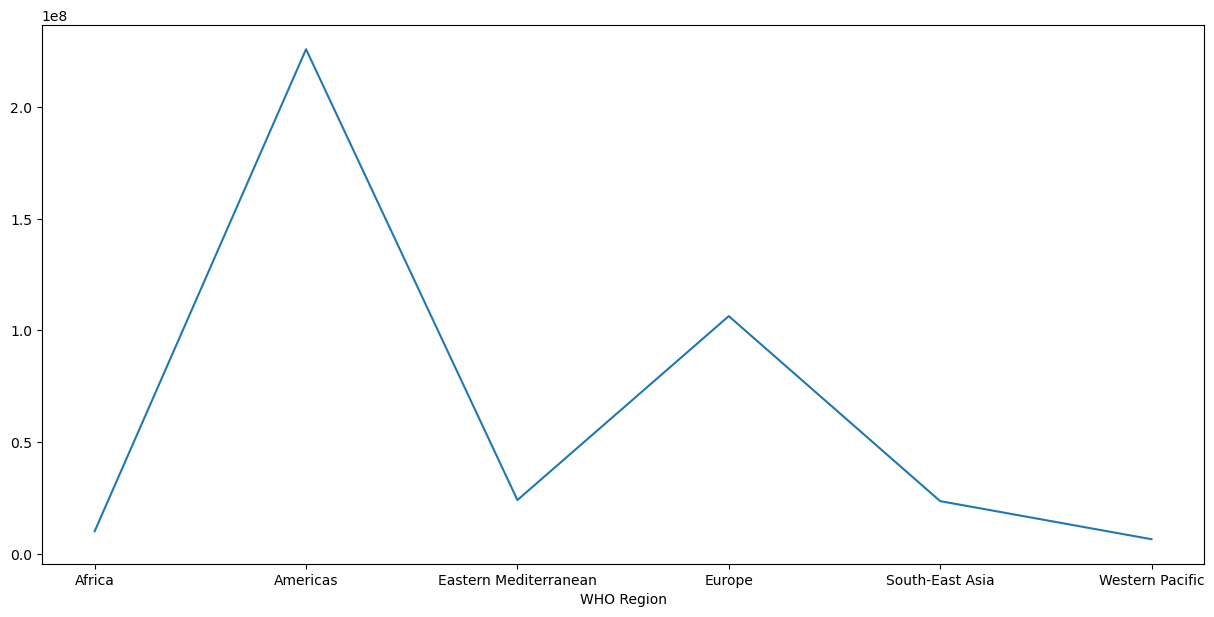

In [113]:
plt.figure(figsize = (15,7))
df.groupby("WHO Region")["Active"].sum().plot()

<h4>Build a model for active cases for one country</h4>

In [114]:
df_india = df[df["Country/Region"] == "India"]

df_india

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia
...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia


In [115]:
df_india = df_india[["Date", "Active"]]
df_india

,Date,Active
129,2020-01-22,0
390,2020-01-23,0
651,2020-01-24,0
912,2020-01-25,0
1173,2020-01-26,0
...,...,...
47892,2020-07-23,440298
48153,2020-07-24,456234
48414,2020-07-25,468002
48675,2020-07-26,485277


In [116]:
df_india = df_india.rename(columns = { 'Date' : 'ds', 'Active' : 'y'})

df_india

,ds,y
129,2020-01-22,0
390,2020-01-23,0
651,2020-01-24,0
912,2020-01-25,0
1173,2020-01-26,0
...,...,...
47892,2020-07-23,440298
48153,2020-07-24,456234
48414,2020-07-25,468002
48675,2020-07-26,485277


In [117]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      188 non-null    object
 1   y       188 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [118]:
df_india["ds"] = pd.to_datetime(df_india["ds"])

In [119]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 129 to 48936
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      188 non-null    datetime64[ns]
 1   y       188 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.4 KB


In [122]:
#To check the missing dates

dates = pd.date_range(start = df_india['ds'].min(), end = df_india['ds'].max(), freq = 'D')

dates

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', length=188, freq='D')

In [123]:
df_india['ds']-dates

129     0 days
390     0 days
651     0 days
912     0 days
1173    0 days
         ...  
47892   0 days
48153   0 days
48414   0 days
48675   0 days
48936   0 days
Length: 188, dtype: timedelta64[ns]

In [125]:
missing_dates = dates.difference(df_india['ds'])

missing_dates

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [126]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 479.2 kB/s eta 0:00:27
   - -------------------------------------- 0.5/13.3 MB 479.2 kB/s eta 0:00:27
   - -------------------------------------- 0.5/13.3 MB 479.2 kB/s eta 0:00:27
   - -------------------------------------- 0.5/13.3 MB 479.2 kB/s eta 0:00:27
   - -------------------------------------- 0.5/13.3 MB 479.2 kB/s eta 0:00:27
   - -------------------------------------- 0.5/13.3 MB 479.2 kB/s eta 0:00:27
   - -------------------------------

In [127]:
from prophet import Prophet

In [128]:
model_prophet = Prophet()

In [129]:
model_prophet.fit(df_india)

01:27:05 - cmdstanpy - INFO - Chain [1] start processing
01:27:06 - cmdstanpy - INFO - Chain [1] done processing


In [133]:
future = model_prophet.make_future_dataframe(periods = 30, include_history = False)

future

,ds
0,2020-07-28
1,2020-07-29
2,2020-07-30
3,2020-07-31
4,2020-08-01
5,2020-08-02
6,2020-08-03
7,2020-08-04
8,2020-08-05
9,2020-08-06


In [134]:
forecast = model_prophet.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-28,451289.631469,436808.101196,465020.727844,451289.631469,451289.631469,-1121.794801,-1121.794801,-1121.794801,-1121.794801,-1121.794801,-1121.794801,0.0,0.0,0.0,450167.836668
1,2020-07-29,459003.867216,443592.973401,472668.386660,458968.425861,459072.779662,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,0.0,0.0,0.0,458520.862436
2,2020-07-30,466718.102963,451469.598232,479586.585331,466509.866407,466956.923903,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,0.0,0.0,0.0,466104.815428
3,2020-07-31,474432.338710,460687.208768,488220.771781,473988.686229,474877.115026,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,-98.814530,0.0,0.0,0.0,474333.524180
4,2020-08-01,482146.574457,467772.585705,496171.768703,481275.534730,482907.247994,192.678831,192.678831,192.678831,192.678831,192.678831,192.678831,0.0,0.0,0.0,482339.253289
5,2020-08-02,489860.810204,476260.961384,505298.832409,488634.336435,490995.014924,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,1065.489371,0.0,0.0,0.0,490926.299575
6,2020-08-03,497575.045951,484176.652080,511859.067218,495979.793757,498989.691921,1058.733445,1058.733445,1058.733445,1058.733445,1058.733445,1058.733445,0.0,0.0,0.0,498633.779397
7,2020-08-04,505289.281698,489717.580803,518849.441304,503285.095891,507252.671646,-1121.794801,-1121.794801,-1121.794801,-1121.794801,-1121.794801,-1121.794801,0.0,0.0,0.0,504167.486897
8,2020-08-05,513003.517445,497633.898258,527273.874654,510414.630681,515426.837723,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,-483.004780,0.0,0.0,0.0,512520.512665
9,2020-08-06,520717.753192,505201.131185,535119.588458,517604.133733,523655.950262,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,-613.287536,0.0,0.0,0.0,520104.465656


In [142]:
final_forecast = forecast[['ds','yhat','yhat_lower','yhat_upper']]

final_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2020-07-28,450167.836668,436808.101196,465020.727844
1,2020-07-29,458520.862436,443592.973401,472668.386660
2,2020-07-30,466104.815428,451469.598232,479586.585331
3,2020-07-31,474333.524180,460687.208768,488220.771781
4,2020-08-01,482339.253289,467772.585705,496171.768703
5,2020-08-02,490926.299575,476260.961384,505298.832409
6,2020-08-03,498633.779397,484176.652080,511859.067218
7,2020-08-04,504167.486897,489717.580803,518849.441304
8,2020-08-05,512520.512665,497633.898258,527273.874654
9,2020-08-06,520104.465656,505201.131185,535119.588458


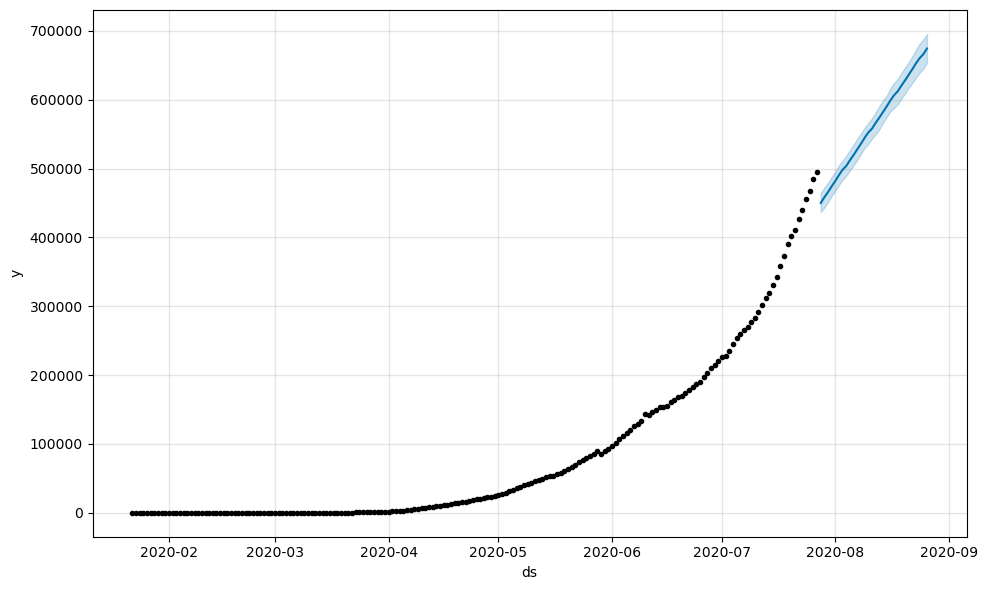

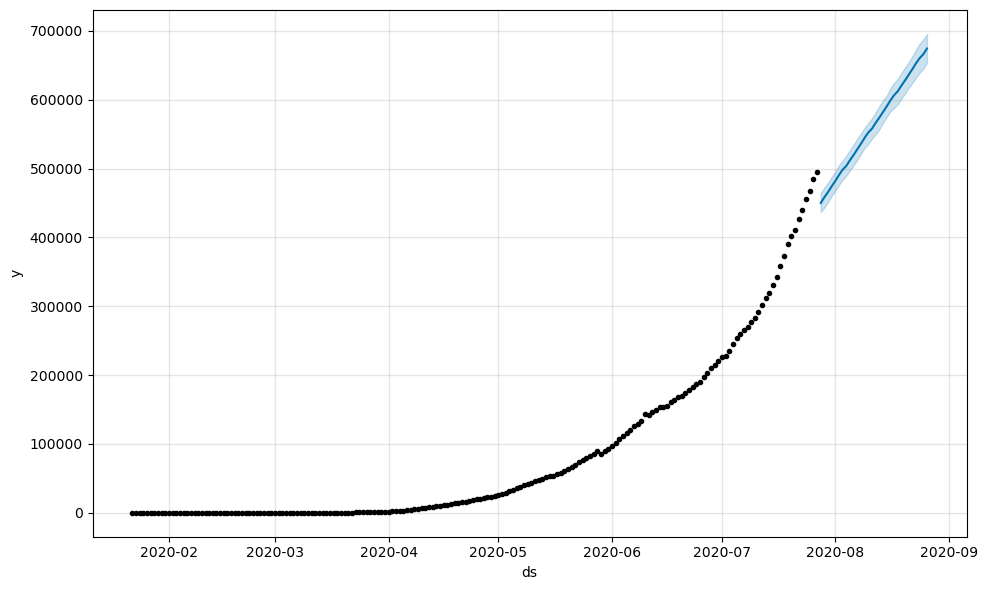

In [143]:
#yhat is the final output

model_prophet.plot(final_forecast)